In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [5]:
#유방암 데이터셋 로드
cancer_data = load_breast_cancer()
cancer_data

cancer_features = cancer_data.data
cancer_labels = cancer_data.target

In [25]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer_features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
cancer_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from collections import Counter

In [59]:
X_train, y_train, X_test, y_test = train_test_split(cancer_features, cancer_labels, 
                                                    test_size = 0.1, random_state = 20)

In [56]:
print(X_train.shape)
print(y_train.shape)

(512, 30)
(57, 30)


In [58]:
print(X_test.shape)
print(y_test.shape)

(512,)
(57,)


# 표준화

In [61]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(y_train)

In [62]:
train_scaled

array([[-0.46582681, -0.15778774, -0.4425519 , ..., -0.18256661,
         0.21411784,  0.2043092 ],
       [ 0.19987922, -0.37641471,  0.16977375, ..., -0.46471577,
         1.20104735, -0.61272718],
       [-0.75725176,  0.39343135, -0.74395357, ..., -0.79879141,
        -0.21029554,  0.26063731],
       ...,
       [-0.80296548, -1.45094306, -0.80936766, ..., -0.39701223,
        -0.25913676, -0.20169932],
       [-0.92010688, -0.85088178, -0.88471808, ..., -0.51710177,
        -0.51513213,  1.34760243],
       [-0.44011284, -0.04847425, -0.40818879, ..., -0.31812687,
        -1.28985495, -0.66682447]])

In [63]:
test_scaled

array([[-0.96867771,  0.25853385, -0.92239329, ..., -0.41998854,
        -0.47471181,  0.1769817 ],
       [ 0.43130492,  0.02362614,  0.34034722, ..., -0.42489016,
        -0.34334576, -0.86704021],
       [ 1.29415135,  1.35632039,  1.36710016, ...,  1.09338482,
         0.93831526,  0.77985974],
       ...,
       [-0.38011359,  0.49576738, -0.40404866, ..., -1.00619096,
        -1.19217251, -0.84361664],
       [-0.62868193, -1.07648621, -0.56592785, ..., -0.81181132,
        -0.26924184,  1.10221266],
       [-0.4229702 , -0.49503148, -0.46201052, ..., -0.22836606,
         0.64526793, -0.5876305 ]])

# PCA 주성분 2개 선택

In [64]:
pca = PCA(n_components = 2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

In [65]:
train_pca
test_pca

array([[-0.71244863,  3.16066007],
       [-1.79920407, -3.11538293],
       [ 6.14874351, -0.64677554],
       [-2.12835957,  0.05134913],
       [ 2.55320976,  2.68491765],
       [ 9.11574467,  0.76051974],
       [ 4.63019921,  0.42871788],
       [-2.51535431,  0.76183055],
       [ 1.57200085,  6.59721666],
       [11.04666437, -3.59594956],
       [ 1.98913127, -2.36660859],
       [-3.3960412 , -0.52533655],
       [ 0.3989347 ,  2.14715605],
       [ 5.43509745, -0.06587629],
       [-0.18006544,  1.55823922],
       [-0.2648063 ,  2.21582865],
       [-3.80130917,  0.87867443],
       [-0.73152825, -3.50492039],
       [ 2.83641395,  0.60383352],
       [ 1.06007691,  8.34389033],
       [-2.25325602,  0.42080644],
       [-4.35270967, -0.04638069],
       [ 1.78009084, -1.51472834],
       [ 0.31317794, -1.53301321],
       [ 4.7570123 , -1.3874963 ],
       [ 6.26106829,  0.9871213 ],
       [ 7.08915643, 10.48622282],
       [-1.12042527, -0.49951147],
       [-0.56273887,

# svm 분류기 훈련

In [66]:
clf_pca = SVC(kernel = 'rbf', gamma = 0.5, C= 0.8)
clf_pca
clf_pca.fit(train_pca, X_test)

SVC(C=0.8, gamma=0.5)

In [68]:
clf_origin = SVC(kernel="rbf", gamma=0.5, C=0.8)
clf_origin.fit(train_scaled, X_test)

SVC(C=0.8, gamma=0.5)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [69]:
#PCA로 축소된 데이터와 해당 데이터에 대한 분류 경계 시각화
colors = ['red', 'blue'] #레이블 0 빨간색, 레이블 1 파란색

#np.vstack((a, b))
#np.concatenate((a, b))
#np.concatenate((a, b), axis = 0)

combined_features = np.vstack((train_pca, test_pca))
combined_labels = np.concatenate((X_test, y_test))

In [78]:
combined_features
combined_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [80]:
xx.shape
yy.shape

(1114, 1193)

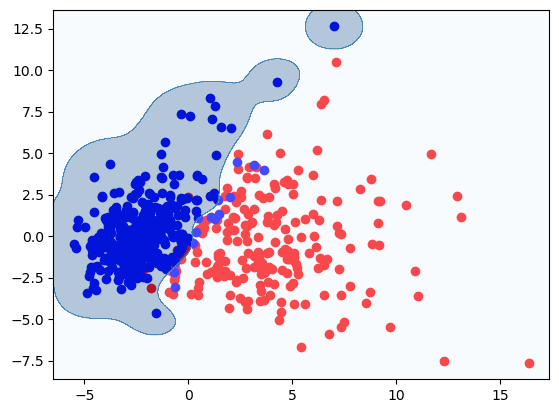

In [82]:
figure, axes = plt.subplots()

for i in range(2):
    indices = np.where(combined_labels == i)
    axes.scatter(combined_features[indices, 0], combined_features[indices, 1], color = colors[i], label=f"class {i}")
    
#분류 경계 그리기
#격자 간격 설정
h = .02
x_min, x_max = combined_features[:, 0].min() - 1, combined_features[:, 0].max() + 1
y_min, y_max = combined_features[:, 1].min() - 1, combined_features[:, 1].max() + 1

#격자 포인트 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#격자내 각 점에 대한 예측 수행
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
#ravel() 다차원 배열을 1차 배열로 만드는 넘파이 함수

#결과를 격자 모양으로 변형
Z = Z.reshape(xx.shape)

#분류경계를 등고선 그래프로 시각화
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = 'Blues')
#alpha :  등고선 그래프의 투명도 조정
#cmap : 등고선 색상 맵을 설정
plt.show()

#최종 결과 : PCA 축소된 데이터의 분류 경계 시각화

# print(xx.ravel())
# print(yy.ravel())

- 격자를 통해 데이터 공간을 분할화고 각 영역에 대한 예측 결과를 시각화 함으로 분류 경계를 보다 명확하게 확인할 수 있다
- 격자 내 각 점에 대한 예측 수행을 통해 각 격자 포인트에서의 클래스 예측을 할 수 있다
- .predict(np.c_[xx.ravel(), yy.ravel()] => 격자 포인트를 1차원 배열로 펼쳐서 예측을 수행함

# 분류기 평가

In [84]:
pca_test_acc = Counter(clf_pca.predict(test_pca) == y_test)
print(pca_test_acc)
#Counter 정확하게 분류된 샘플의 개수를 계산

orig_test_acc = Counter(clf_origin.predict(test_scaled) == y_test)
print(orig_test_acc)

Counter({True: 55, False: 2})
Counter({True: 41, False: 16})


In [85]:
#결과출력
p_acc = clf_pca.score(test_pca, y_test)
o_acc = clf_origin.score(test_scaled, y_test)
print(f"PCA 분석을 사용한 테스트 데이터 셋의 정확도 : {p_acc:.3f}")
print(f"PCA 분석을 사용하지 않은 테스트 데이터 셋의 정확도 : {o_acc:.3f}")

PCA 분석을 사용한 테스트 데이터 셋의 정확도 : 0.965
PCA 분석을 사용하지 않은 테스트 데이터 셋의 정확도 : 0.719
